# Introduction

Here our objective is to find who and why people are churning from bank.

What is in this Notebook.

1.Collecting data.

2.Exploratory data analysis.

3.Data wrangling.

4.Model building.



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

#Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# How the Target is created in chrun case

# e.g.

# the customer characterstics/features are taken from the month of Jan 2021 and its exit status is checked in 
# July 2021(6 months later),so this means with current characterstics you will be predicting 
# whether the person will churn the bank in next 6 months or not

# Jan 2021 - 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
#        'IsActiveMember', 'EstimatedSalary'

# July 2021 - 'Exited'/'Churn'


At first glance i don't think  'RowNumber'	'CustomerId'	'Surname' will evenfull in opur way.So drop them first.

In [5]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [6]:
df.shape

(10000, 11)

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

From the above description we are seeing no null values. 

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

So here we are mainly seeing 2 types of features.

1.Numerical(float and int):CreditScore, Age, Tenure,Balance,EstimatedSalary .

2.Categorical:Geography and Gender, NumOfProducts, HasCrCard, IsActiveMember, Exited, 

<AxesSubplot:title={'center':'Correlation of Features'}>

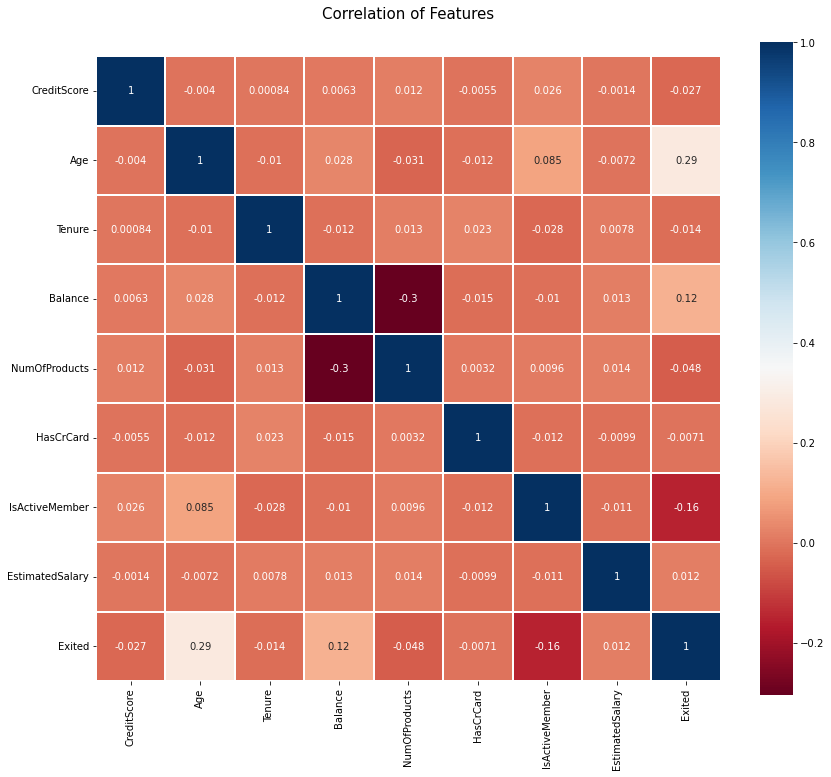

In [11]:
#Let's have the corelation among the features
drop_elements = ['Geography', 'Gender']
new_df = df.drop(drop_elements, axis = 1)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(new_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From the above diagram we are seeing that 'Age', 'Balance' are greatly connected with target variable. 

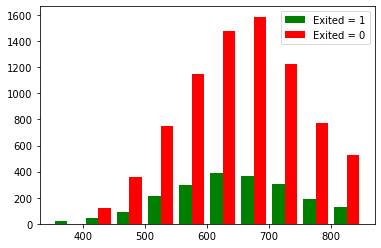

In [12]:
#Let'us see the realationship between numercal features and the target features.
creditscore_yes = df[df.Exited== 1].CreditScore
creditscore_no = df[df.Exited== 0].CreditScore

plt.hist([creditscore_yes, creditscore_no], color = ['green', 'red'], label = ['Exited = 1', 'Exited = 0'] )
plt.legend()

from the above histogram we are seeing that Credit score ranging from 600-750 didn't exited from the bank.
And we seeing a Normal distribution of creditscore.

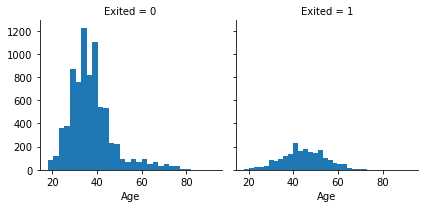

In [13]:
g = sns.FacetGrid(df, col='Exited')
g.map(plt.hist, 'Age', bins=30)

Here we are seeing that

1.Age ranging from 30-43 are most likely to not exited from the bank.

2.People who's age is near 35 and 40 are most in number in not exiting from bank.

3.And on the other hand around 40-45 age's people are exited from the bank.

4.Here most noticable thing is the oldest men in the are ranging in 76-80 and none of them are exited from the bank.


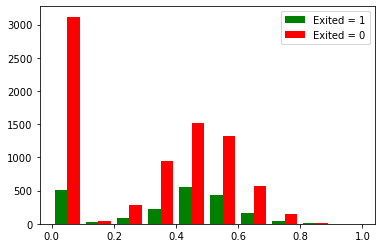

In [160]:
Balance_yes = df[df.Exited== 1].Balance
Balance_no = df[df.Exited== 0].Balance

plt.hist([Balance_yes, Balance_no], color = ['green', 'red'], label = ['Exited = 1', 'Exited = 0'] )
plt.legend()

In [ ]:
def ratio_bal(m):
    x = len(m[m.Exited == 1].Exited)
    y = len(m[m.Exited == 0].Exited)
    print(x)
    print(y)
    print("Exited ",(x/(x+y))*100)
    print("Not Exited",(y/(x+y))*100)

ratio_bal(df)

In [15]:
#Here we are seeing a lot's persomn having 0 balance,let's check it.
x = len(df[df.Balance == 0].Balance)
x

3617

Here most interest things to notice is 3617 customer of this bank has 0 balance.

And out of 3617, 3017 didn't exited from the bank


<AxesSubplot:xlabel='Gender', ylabel='count'>

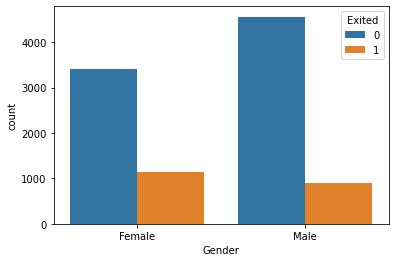

In [16]:
sns.countplot(x = 'Gender',hue = 'Exited', data = df)

In [17]:
len(df[df.Gender == 'Male'].Gender)

5457

In [18]:
len(df[df.Gender == 'Female'].Gender)

4543

Here we are seeing that Male and Female customer in the bank is same but Male person are not likely to exited from the bank then Female.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

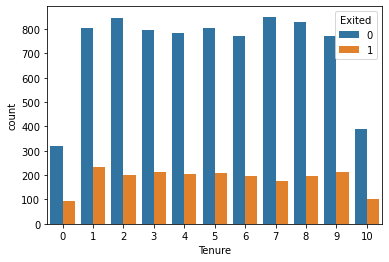

In [19]:
sns.countplot(x = 'Tenure', hue = 'Exited', data = df)

Here we are seeing not so much difference.People are engaged with bank for 1-9 months has same mentality or thought process wheather to exit or not.


In [20]:
len(df[df.Tenure == 10].Tenure)

490

Yes people who are engaged with the bank for 10 monthes is less in number that's why we are seeing less height in histogram.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

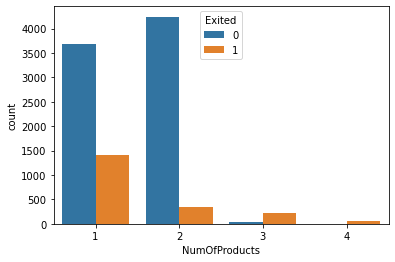

In [21]:
sns.countplot(x ='NumOfProducts', hue = 'Exited', data = df )

From the above histogram we are noticing that:

1.Customers who has NumOfProducts = 2 are mostly likely to stay in the bank.

2.And customers are totally exited from bank having 4 products.


## Analyze by pivoting featuress

Let's analyze our feature correlations by pivoting features against each other. It also makes sense doing so only for features which are categorical type.


In [22]:
# cat_features = df[['Geography','Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']].columns


df[['Geography', "Exited"]].groupby(['Geography'], as_index=False).mean().sort_values(by="Exited", ascending=False)

,Geography,Exited
1,Germany,0.324432
2,Spain,0.166734
0,France,0.161548


In [23]:
df[['Gender', "Exited"]].groupby(['Gender'], as_index=False).mean().sort_values(by="Exited", ascending=False)

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


In [24]:
df[['NumOfProducts', "Exited"]].groupby(['NumOfProducts'], as_index=False).mean().sort_values(by="Exited", ascending=False)

,NumOfProducts,Exited
3,4,1.000000
2,3,0.827068
0,1,0.277144
1,2,0.075817


In [25]:
df[['HasCrCard', "Exited"]].groupby(['HasCrCard'], as_index=False).mean().sort_values(by="Exited", ascending=False)

,HasCrCard,Exited
0,0,0.208149
1,1,0.201843


In [26]:
df[['IsActiveMember', "Exited"]].groupby(['IsActiveMember'], as_index=False).mean().sort_values(by="Exited", ascending=False)

,IsActiveMember,Exited
0,0,0.268509
1,1,0.142691


<AxesSubplot:xlabel='Geography', ylabel='count'>

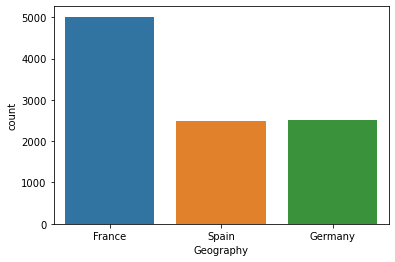

In [27]:
sns.countplot(x = 'Geography', data = df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

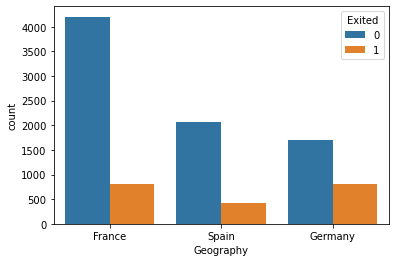

In [28]:

sns.countplot(x = 'Geography',hue = 'Exited', data = df)

Analyzing basis Geography feature and Grouping the dataset by Geography.

In [29]:
g = df.groupby('Geography')

In [30]:
France = g.get_group('France')
Germany = g.get_group('Germany')
Spain = g.get_group('Spain')



Let's find out the ratio of exiting and non exiting person of each country.

In [31]:
def ratio(m):
    x = len(m[m.Exited == 1].Exited)
    y = len(m[m.Exited == 0].Exited)
    print(x)
    print(y)
    ratio = x/y
    
    return ratio

In [32]:
ratio(France)

810
4204


0.19267364414843008

In [33]:
ratio(Germany)


814
1695


0.48023598820059

In [34]:
ratio(Spain)

413
2064


0.2000968992248062

From the above information we are clearly seeing that

1.people from Germany are most likly to exit from bank.

2.And Bank has most of the customers from France.

and let's try to find out the causes.

<AxesSubplot:xlabel='Age', ylabel='Density'>

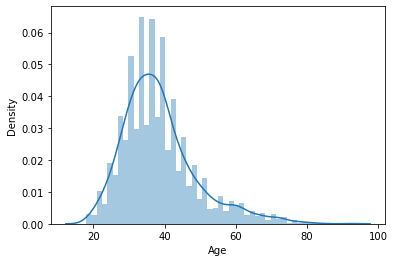

In [35]:
sns.distplot(France.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

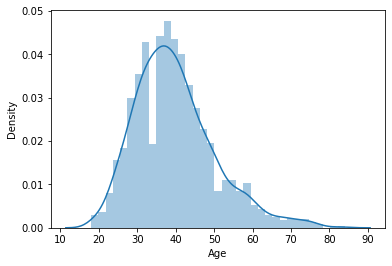

In [36]:
sns.distplot(Germany.Age)

<AxesSubplot:xlabel='Age', ylabel='Density'>

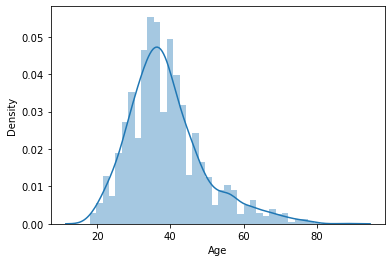

In [37]:
sns.distplot(Spain.Age)

if we observe this three diagram we will see that top most high peak is ranging between 30-40 in the case
of Spain and france.

And in the case of Germany ther is high peak between 38-45.

And if we compare this result with the earlier we get from Age distribution of total data, That's reason
people from Germany are are more likly to exit Because their majority people are in the age rangr 40-50.

Let's more clear with help of some more visualization.

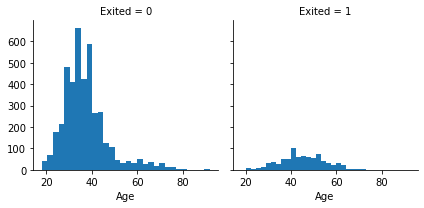

In [38]:
g = sns.FacetGrid(France, col='Exited')
g.map(plt.hist, 'Age', bins=30)

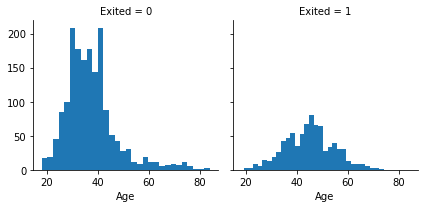

In [39]:
g = sns.FacetGrid(Germany, col='Exited')
g.map(plt.hist, 'Age', bins=30)

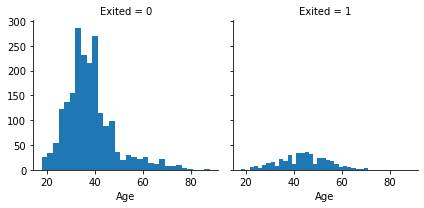

In [40]:
g = sns.FacetGrid(Spain, col='Exited')
g.map(plt.hist, 'Age', bins=30)

In [41]:
len(France[France.Age > 78].Age)

13

In [42]:
len(Germany[Germany.Age > 78].Age)

3

In [43]:
len(Spain[Spain.Age > 78].Age)

3


This is another interesting point. Most of the senior person in the Bank are from France.That's why their ratio is less then rest two.
Becouse we have found that none of the senior customer are exiting.

In [44]:
# let's Check Balane features with respect to each country.
x = len(France[France.Balance == 0].Balance)

x

2418

In [45]:
x = len(Germany[Germany.Balance == 0].Balance)
y = len(Germany[Germany.Balance >100000].Balance)

print('Customer  having balance, 0 = ' ,x)
print('Customer  having balance greater then, 100000  = ' ,y)


Customer  having balance, 0 =  0
Customer  having balance greater then, 100000  =  1966


In [46]:
x = len(Spain[Spain.Balance == 0].Balance)
x

1199

From those above figure We get some important information.

1.Every customer who are from Germany has balance And around 2000 customers has balance greater then 100000.They are likly to exit from the bank most.
Which means, there is strong possibility that they are facing problem while playing with money.

2.ALmost two third of person who are from France are not interested in having balance.


<AxesSubplot:xlabel='Gender', ylabel='count'>

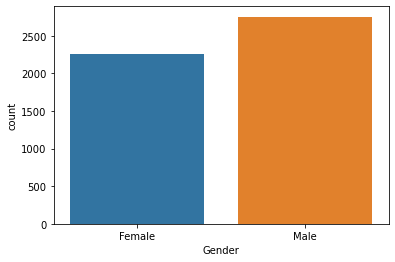

In [47]:
sns.countplot(x = 'Gender', data = France)

<AxesSubplot:xlabel='Gender', ylabel='count'>

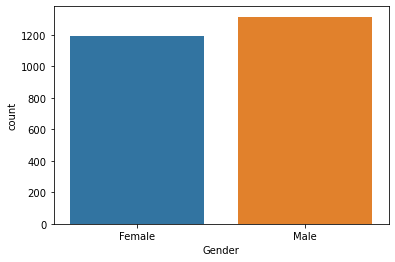

In [48]:
sns.countplot(x = 'Gender', data = Germany)

<AxesSubplot:xlabel='Gender', ylabel='count'>

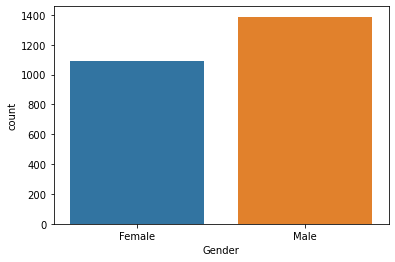

In [49]:

sns.countplot(x = 'Gender', data = Spain)

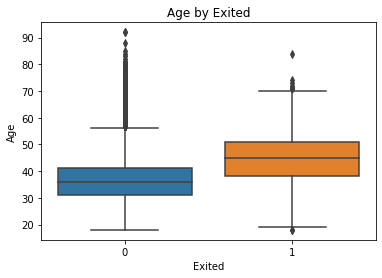

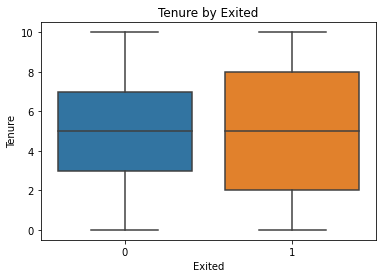

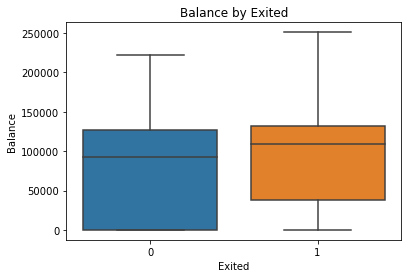

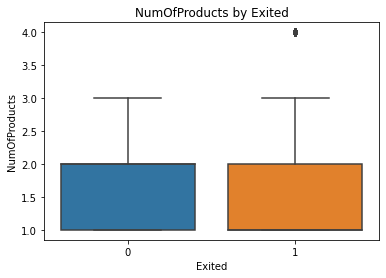

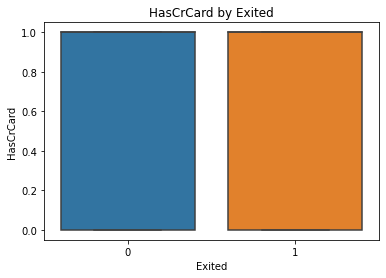

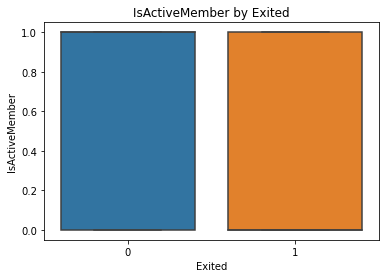

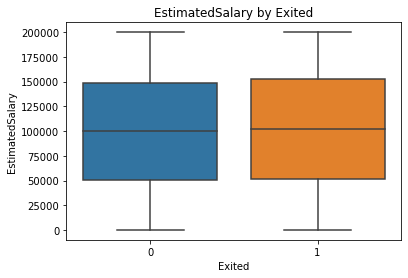

In [50]:
## distribution and checking for outliers in numeric features

features = df[['Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']].columns
for i in features:
    sns.boxplot(x="Exited",y=i,data=df)
    plt.title(i+" by "+"Exited")
    plt.show()

Here we are not seeing too much outliers except the age column.And we can't delete or replace them because those rows are actually eventfull in our way, if want to treat can use any of the outlier treatment method.

# Conclusion:

All the deep insights that i have gotten by analysis.

1. Credit score ranging from 600-750 are most likely not to exited from the bank.

2.Age ranging from 30-43 are most likely to not exited from the bank.

3.People who's age is near 35 and 40 are most in number in not exiting from bank.

4.And on the other hand around 40-45 age's people are exited from the bank.

5.Here most noticable thing is the oldest men in the are ranging in 76-80 and none of them are exited from the bank.

6.Customers who has NumOfProducts = 2 are mostly likely to stay in the bank.

7.And customers are totally exited from bank having 4 products.

8.people from Germany are most likly to exit from bank.

9.And Bank has most of the customers from France.

10.People from Germany are are more likly to exit Because their majority people are in the age rangr 40-50.

11.Most of the senior person in the company are from France.

12.Every customer who are from Germany has balance And arround 2000 customers has balance greater then 100000.They are likly to exit from the bank most.
Which means, there is strong possibility that they are facing problem while playing with money.

13.ALmost two third of person who are from France are not interested in having balance.









In [51]:
#Mapping the Gender and Geography features.
df['Gender'] = df['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int)

In [52]:
df = pd.get_dummies(df, columns=['Geography'])

In [53]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [54]:
#Let's scale down the data.

cols_to_scale = ['Balance','EstimatedSalary']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [55]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,608,1,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,502,1,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,699,1,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,850,1,43,2,0.500246,1,1,1,0.395400,0,0,0,1


In [56]:
new_df = df.copy()
# df=new_df.copy()

In [57]:
# While selecting the feature always think that will you be able to get these feature values for near future too, sometimes 
# we do include futuristic data (next quater GDP Value) as a feautre and that is not coorect bcz it won't be available with new data to be predicted

X = df.drop(['Exited'], axis=1)
# X = df         # feature

y = df.Exited  # label

In [58]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
len(X_test.columns)

12

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# Modelling

### RF and DT

In [62]:
# Training on RF ALGO
# With increase in n_estimators the model will become more stable, reliable and universal and will reduce overfitting
# favourable range of n_estimators is (500-900)

# with decrease in Max depth the model will become more stable, reliable and universal and will reduce overfitting 
# favourable range of Max depth is (5-10)

# rf_model=RandomForestClassifier(n_estimators=700,max_depth=8)

rf_model=RandomForestClassifier()


rf_model.fit(X_train,y_train)

display(
    
    rf_model.score(X_train,y_train),
    
    rf_model.score(X_test,y_test)
    
)


1.0

0.8696666666666667

In [63]:
X_test.iloc[0]

CreditScore          596.000000
Gender                 0.000000
Age                   32.000000
Tenure                 3.000000
Balance                0.385452
NumOfProducts          2.000000
HasCrCard              0.000000
IsActiveMember         0.000000
EstimatedSalary        0.208904
Geography_France       0.000000
Geography_Germany      1.000000
Geography_Spain        0.000000
Name: 6252, dtype: float64

In [64]:
# By default the threshold is 50% (.5) set in the algorithms, so whichever class have probability >.5 will be given as o/p

rf_model.predict_proba([X_test.iloc[25].values])[:,1]

array([0.51])

In [65]:
rf_model.predict([X_test.iloc[25]])

array([1], dtype=int64)

In [66]:
rf_model.predict_proba(X_test)[:,1]

array([0.05, 0.01, 0.12, ..., 0.04, 0.  , 0.39])

In [67]:
# predicting on single entry

rf_model.predict([X_test.iloc[210].values])

array([0], dtype=int64)

In [68]:
rf_model.feature_importances_

array([0.14272831, 0.02052802, 0.24143159, 0.08309558, 0.1404726 ,
       0.13037313, 0.01876839, 0.03969145, 0.14393748, 0.01008389,
       0.0202155 , 0.00867407])

In [69]:
# Feature Importance - it tells which feature have been used the most for splitting (the least impure feature) among all
# the decision tree

pd.DataFrame(rf_model.feature_importances_,index=X.columns).sort_values(0,ascending=False)

,0
Age,0.241432
EstimatedSalary,0.143937
CreditScore,0.142728
Balance,0.140473
NumOfProducts,0.130373
Tenure,0.083096
IsActiveMember,0.039691
Gender,0.020528
Geography_Germany,0.020215
HasCrCard,0.018768


## Over Fitting & Under fitting

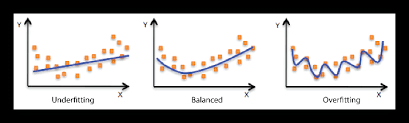

### DATA = PATTERN + NOISE

#### Over fitting

train - 100 % 

test - 86 % 

We want the alogs to catch/learn the pattern and not noise, and if the algorithm learn the noise as well then it may lead to overfitting

The above result of RF is an example of Over fitting - i.e. the accuracy on the training data (100%) is way higher than the accuracy on test data (87%). As a benchmark, if the difference is greater then 8-10% between train and test then it is called as overfitting.


#### Under fitting

train - 50-60 %

test - 40 %

In this case the algorithm is not able to produce the result on the training data itself, thus it means it is not able to 
learn the patterns of the data properly

#### Correct fitting

train - 92-93 %

test - 87-88 %

In this you need to check 2 things in sequence

1) Check whether is accuracy on training data is satisfactory to the client as per the patterns present in data. The normal industry bencgh mark is >85%

2) the diffence b/w train and test accracy is not more than 8-9 % - if this is not followed & the difference is huge then it is 
    overfitting case.


### We prefer Random forest over decision tree because it prevents overfitting, as random forest is a generalised model





In [70]:
# Training on DT ALGO

dt_model=DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

display(
    
    dt_model.score(X_train,y_train),
    
    dt_model.score(X_test,y_test)
    
)

1.0

0.7993333333333333

In [71]:
# DT Feaure Importance

pd.DataFrame(dt_model.feature_importances_,index=X.columns).sort_values(0,ascending=False)

,0
Age,0.222463
EstimatedSalary,0.155417
Balance,0.150871
CreditScore,0.143077
NumOfProducts,0.119481
Tenure,0.068851
IsActiveMember,0.068024
Gender,0.021270
Geography_Germany,0.020602
HasCrCard,0.014291


# Model Selection with Hyperparameter tuning:

In this we will modify the parameters of the algorithms.

## Parameter Grid:

In [72]:
# use this structure if you want to try multiple algoriths (with hyper parameter tuning) over your data

model_params = {
    
   'random-forest' : {
       
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [50, 100, 200, 300, 500], 
             "max_depth": [3, 5, 7, 9, 11, 13],
            
         }
    },
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [3, 5, 7, 9, 11, 13],
        }
    }
    
}

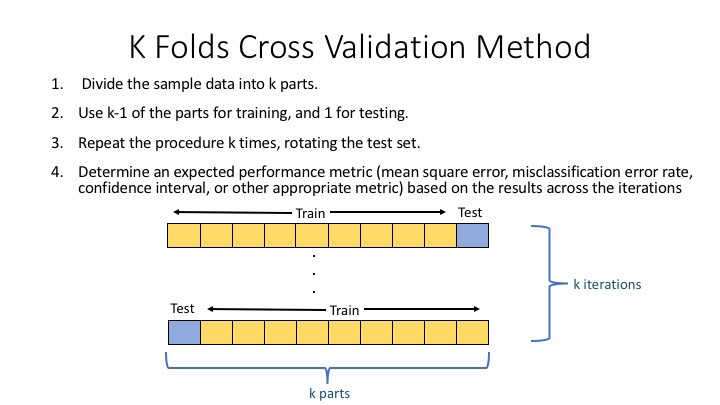

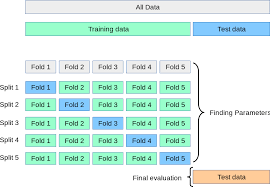

In [73]:
model_params.items()

dict_items([('random-forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}}), ('decision_tree', {'model': DecisionTreeClassifier(), 'params': {'max_depth': [3, 5, 7, 9, 11, 13]}})])

In [74]:
# we always prefer the CV (Cross validation or K-FOLD) value b/w the range (3,10) 

# RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the 
# best set of hyperparameters which gives the best score as an output

# RandomizedSe v/s GridSearchCV :
#     1) pros - RCV is faster than GCV 
#     2) Cons - the best param combination might not be given as an o/p in RCV


# if you don't have any time constraint then GCV is recommended.

model_scores = {}

for model_name ,mp in model_params.items():
    
    print('model_name :',model_name,' mp: ', mp,'\n\n')
    
    clf = RandomizedSearchCV(mp['model'],mp['params'], cv = 3,verbose=3)
    
#     clf = GridSearchCV(mp['model'],mp['params'], cv = 3,verbose=3)
   
    clf.fit(X_train,y_train)
        
    model_scores[model_name]={'best_score' : clf.best_score_,
                              'best_params' : clf.best_params_}
    
        
    

model_name : random-forest  mp:  {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [3, 5, 7, 9, 11, 13]}} 


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .....max_depth=7, n_estimators=500;, score=0.847 total time=   4.8s
[CV 2/3] END .....max_depth=7, n_estimators=500;, score=0.866 total time=   5.2s
[CV 3/3] END .....max_depth=7, n_estimators=500;, score=0.856 total time=   5.4s
[CV 1/3] END ....max_depth=11, n_estimators=300;, score=0.862 total time=   3.7s
[CV 2/3] END ....max_depth=11, n_estimators=300;, score=0.870 total time=   3.8s
[CV 3/3] END ....max_depth=11, n_estimators=300;, score=0.858 total time=   4.3s
[CV 1/3] END .....max_depth=7, n_estimators=100;, score=0.847 total time=   1.1s
[CV 2/3] END .....max_depth=7, n_estimators=100;, score=0.863 total time=   1.1s
[CV 3/3] END .....max_depth=7, n_estimators=100;, score=0.851 total time=   0.9s
[CV 1/3] END .....max_depth=5, n_estimators=100;,

In [75]:
model_scores

{'random-forest': {'best_score': 0.8632858311378305,
  'best_params': {'n_estimators': 300, 'max_depth': 11}},
 'decision_tree': {'best_score': 0.8505715653099175,
  'best_params': {'max_depth': 7}}}

### Grid search CV O/P

{'random-forest': {'best_score': 0.8648574230153825,

      'best_params': {'max_depth': 11, 'n_estimators': 300}},

'decision_tree': {'best_score': 0.850429850855178,

       'best_params': {'max_depth': 5}}}

In [76]:
model_1=RandomForestClassifier(n_estimators=500, max_depth=13)

model_1.fit(X_train,y_train)

display(
    
    model_1.score(X_train,y_train),
    
    model_1.score(X_test,y_test)
    
)

# GCV - 0.9155714285714286, 0.8716666666666667

# RCV - 0.9505714285714286, 0.8696666666666667



0.9497142857142857

0.8693333333333333

### Span of Client Project (team size 3-4 members)

#### *Before Project start:*

1) Bussiness problem identification

2) Bussiness solutioning done by the team (Domain + technical)

3) Architectural solution being build up for the solution (can be modified during the project requirements) (technical)

4) Entire Infra being setup for the project


#### *After project start:*

1) 1-2 Weeks - Data collection - checking whether you have access to all the data sources, servers, etc

2) 2.5 - 3 Month : month for data pre-processing - merge the data, outliers, missing value, eda, prepare the data for model building

3) 1-2 Month: Model Building

4) 1-2 Month: Model deployment, handover, KT(knowldge transfer) to client.

Total project timeline : 6-7 Months

 #### After Project end:

1) provide support to the client for 1-2 Month

2) Make prediction on New data shared by the client - it is chargable

3) Normally after 7-8 Months or after Accuracy drop of the model, The model is refreshed i.e the new data is incorporated into the ML Model and The Model is made again.




In [77]:
# predicting on Test data using the model 

y_pred=model_1.predict(X_test)
print(*y_pred[0:20])

0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0


In [78]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(*y_pred[0:20])

0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0


In [79]:
# !pip install six
# !pip install pydot

In [80]:
from six import StringIO  
import pydot
from sklearn import tree

In [81]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [82]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 44.50
|   |--- feature_5 <= 2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_2 <= 38.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  38.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_5 >  1.50
|   |   |   |--- feature_4 <= 0.43
|   |   |   |   |--- feature_2 <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  39.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.43
|   |   |   |   |--- feature_4 <= 0.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.82
|   |   |   |   |   |--- class: 1
|   |--- feature_5 >  2.50
|   |   |--- feature_4 <= 0.23
|   |   |   |--- feature_2 <= 37.50
|   |   |   |   |--- feature_8 <= 0.62
|   |   |   |   |   |-

In [83]:
with open("decistion_tree.log", "w") as f_out:
    f_out.write(text_representation)

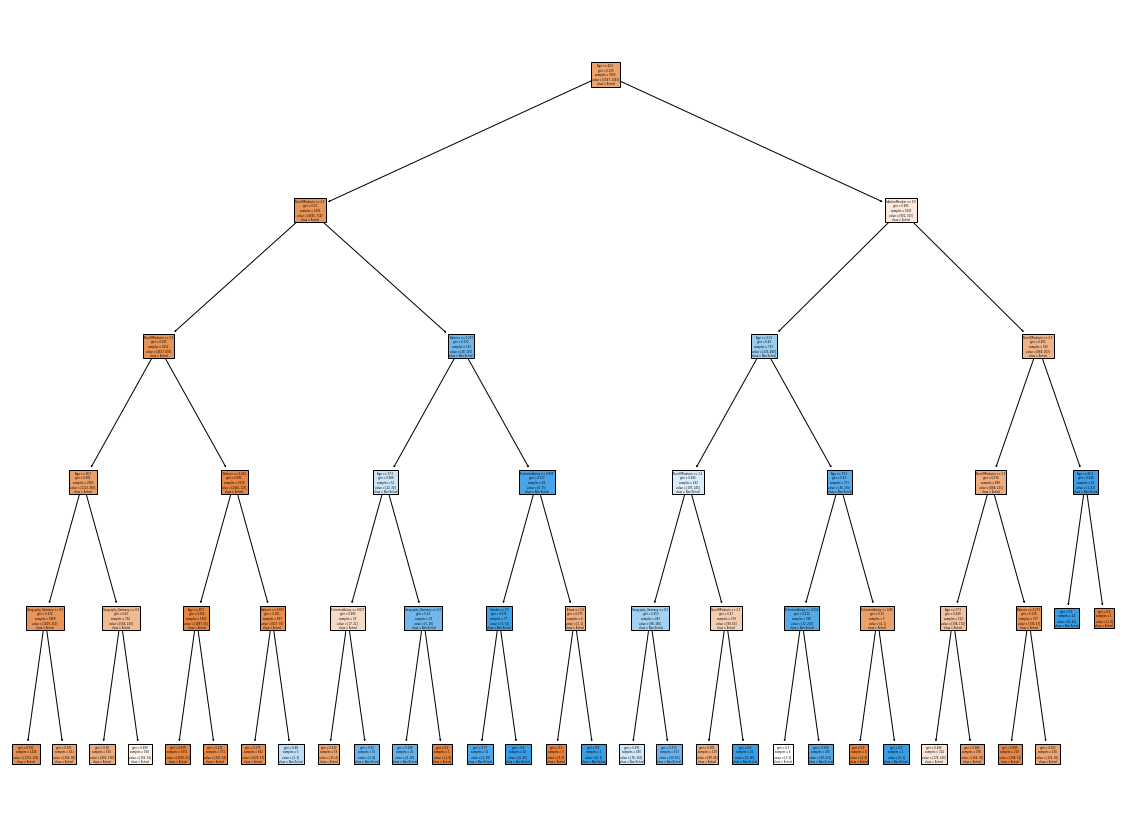

In [84]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['Exited','Non-Exited'],
                   filled=True)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,roc_auc_score, accuracy_score, average_precision_score,confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [138]:
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,10))
n_neighbors = list(range(1,31))
#p=[1,2]

#Convert to dictionary
log_param_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

#Create new object
model_LogisticReg = LogisticRegression()

#Use GridSearch
grid_log= GridSearchCV(model_LogisticReg, param_grid = log_param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)


# fitting the model for grid search
grid_search=grid_log.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [140]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [141]:
#Train Data Accuracy

model_LogisticReg = LogisticRegression(C= grid_search.best_params_['C'], penalty = grid_search.best_params_['penalty'])
  
model_LogisticReg.fit(X_train, y_train)

y_test_Log_pred=model_LogisticReg.predict(X_test) 

display
(
    model_LogisticReg.score(X_train, y_train),
    model_LogisticReg.score(X_test, y_test)
)

print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100) )
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(accuracy_score(y_test,y_test_Log_pred)*100) )


Accuracy for our training dataset with tuning is : 80.87%
Accuracy for our testing dataset with tuning is : 81.30%


In [142]:
y_pred_log_probability = model_LogisticReg.predict_proba(X_test)[:,1]
pd.DataFrame({"Actual":y_test, "Predicted":y_test_Log_pred})

,Actual,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
...,...,...
8014,0,0
1074,0,0
3063,0,0
6487,0,0


#### Metrics - classificationreport, AccuracyScore,confusion_matrix

In [145]:
classificationreport = pd.DataFrame(classification_report(y_test,y_test_Log_pred,output_dict=True)).transpose()
print(classificationreport)

cmat = pd.DataFrame(confusion_matrix(y_test,y_test_Log_pred), columns = ("Positive","Negative"), index=["Positive","Negative"])
print(cmat)


              precision    recall  f1-score   support
0              0.833753  0.959023  0.892012  2416.000
1              0.552036  0.208904  0.303106   584.000
accuracy       0.813000  0.813000  0.813000     0.813
macro avg      0.692895  0.583964  0.597559  3000.000
weighted avg   0.778912  0.813000  0.777371  3000.000
          Positive  Negative
Positive      2317        99
Negative       462       122


In [116]:
print(accuracy_score(y_test,y_pred))

0.813


#### ROC Curves

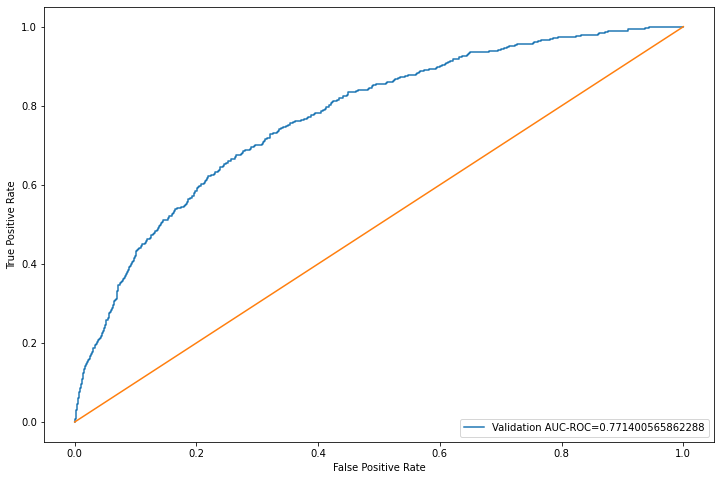

In [146]:
fpr, tpr, _ = roc_curve(y_test,y_pred_log_probability) 
auc = roc_auc_score(y_test, y_pred_log_probability) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

#### AUC Score

In [147]:
roc_auc_score(y_test, y_pred_log_probability)

0.771400565862288

#### Precision-Recall Curve

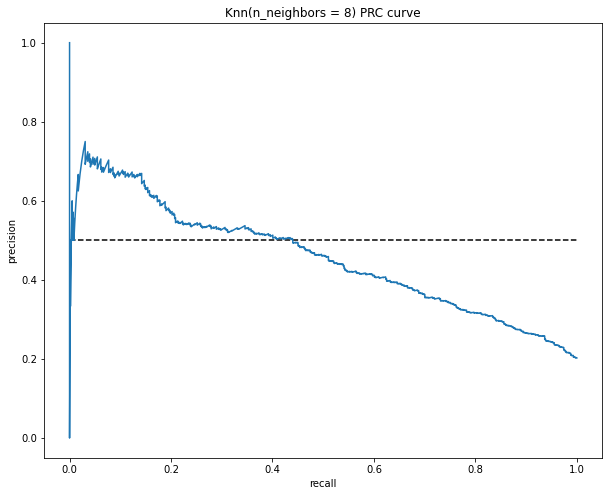

In [148]:
precisionrecalllogreg,recalllogreg,thresholdlogreg = precision_recall_curve(y_test,y_pred_log_probability)

apslogreg = average_precision_score(y_test,y_pred_log_probability)
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recalllogreg, precisionrecalllogreg, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [ ]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y_all):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y_all.loc[df_index],y_all.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

## KNN

In [129]:
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,10))
n_neighbors = list(range(1,31))
#p=[1,2]

#Convert to dictionary
param_grid = dict(n_neighbors=n_neighbors)  #This is a best way but just to run here below line is used
#param_grid = dict(leaf_size=leaf_size,n_neighbors=n_neighbors)

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)


# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [130]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'n_neighbors': 16}
KNeighborsClassifier(n_neighbors=16)


In [133]:
#Train Data Accuracy

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

knn.fit(X_train, y_train)

y_test_KNN_pred=knn.predict(X_test) 

display
(
    knn.score(X_train, y_train),
    knn.score(X_test, y_test)
)

print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100) )
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(accuracy_score(y_test,y_test_KNN_pred)*100) )


Accuracy for our training dataset with tuning is : 79.87%
Accuracy for our testing dataset with tuning is : 80.90%


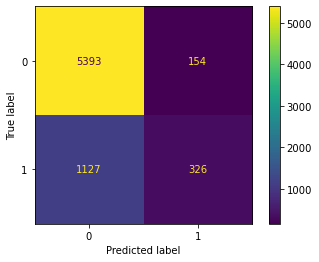

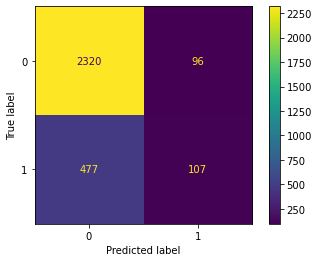

In [137]:
plot_confusion_matrix(grid,X_train, y_train,values_format='d' )
plot_confusion_matrix(grid,X_test, y_test,values_format='d' )